In [1]:
pwd

'/Users/wangjian/Kaggle-Comp/titanic'

In [2]:
ls

Untitled.ipynb  titanic/


In [3]:
ls titanic

gender_submission.csv* test.csv*              train.csv*


In [4]:
import pandas as pd

In [6]:
sub = pd.read_csv('titanic/gender_submission.csv')
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

In [9]:
train_data.shape

(891, 12)

In [34]:
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [10]:
test_data.shape

(418, 11)

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
ls

Untitled.ipynb  input/          titanic1.py


In [24]:
ls input

gender_submission.csv* test.csv*              train.csv*


In [27]:
import pandas as pd
import numpy as np
from math import sqrt
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

# 1 数据导入
file_path = 'input/train.csv'
data = pd.read_csv(file_path)
data_cate = data.select_dtypes(['object'])
data_without_cate = data.select_dtypes(exclude=['object'])
one_hot_data_cate = pd.get_dummies(data_cate)
data_dummy = pd.concat([data_without_cate, one_hot_data_cate], axis=1)

# 2 选取变量
y = data_dummy.Survived
X = data_dummy.drop(['Survived'], axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# 3 建模讯模
my_pipeline = make_pipeline(Imputer(), XGBRegressor(n_estimators=1000, learning_rate=0.05))
my_pipeline.fit(train_X, train_y)

# 4 误差验证
val_preds = my_pipeline.predict(val_X)
val_preds

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


array([ 9.22284007e-01,  3.76802087e-02,  8.98836970e-01,  6.64727509e-01,
        9.42778766e-01,  4.25734818e-02,  2.94422805e-02,  9.34010983e-01,
        2.53764093e-01,  6.83638871e-01,  4.25734818e-02,  4.63364214e-01,
        1.36643887e-01,  3.00073922e-02,  6.63864851e-01,  2.18891501e-01,
        1.89058483e-02,  4.60164249e-02,  3.20268571e-02,  8.31640601e-01,
        5.14788330e-02,  9.44443643e-02,  9.81350303e-01,  1.05699748e-01,
        7.23934233e-01,  4.60164249e-02,  9.95191693e-01,  8.68032813e-01,
        4.60164249e-02,  9.64366436e-01,  4.59785253e-01,  1.96700305e-01,
        1.74642652e-01,  4.59785253e-01,  8.49253833e-02,  6.46396577e-01,
        2.24353790e-01,  1.72295570e-02,  2.63706595e-01,  4.40375209e-02,
        4.63364214e-01,  4.63364214e-01,  9.46055174e-01,  1.78621322e-01,
        9.94358242e-01,  2.00993717e-02, -5.25212288e-03,  4.54513133e-02,
        5.80574214e-01,  9.05417204e-02,  8.95338058e-02,  8.63704681e-01,
        6.26912713e-02,  

In [30]:
val_pre = [int(item>0.5) for  item in val_preds]
val_pre

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0]

In [31]:
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

Accuracy: 0.789238


In [32]:
import pandas as pd
import numpy as np
from math import sqrt
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

# 1 数据导入
file_path = 'input/train.csv'
data = pd.read_csv(file_path)
data_cate = data.select_dtypes(['object'])
data_without_cate = data.select_dtypes(exclude=['object'])
one_hot_data_cate = pd.get_dummies(data_cate)
data_dummy = pd.concat([data_without_cate, one_hot_data_cate], axis=1)

# 2 选取变量
y = data_dummy.Survived
X = data_dummy.drop(['Survived'], axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# 3 建模讯模
my_pipeline = make_pipeline(Imputer(), XGBRegressor(n_estimators=1000, learning_rate=0.05))
my_pipeline.fit(train_X, train_y)
# 4 误差验证
val_preds = my_pipeline.predict(val_X)
val_pre = [int(item>0.5) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

# 5 全数据训练模型
pipeline_on_full_data = make_pipeline(Imputer(), XGBRegressor(n_estimators=1000, learning_rate=0.05))
pipeline_on_full_data.fit(X, y, early_stopping_rounds=5, verbose=False)

# 6 模型预测结果组
test_data_path = 'input/test.csv'
test_data = pd.read_csv(test_data_path)
one_hot_test_data = pd.get_dummies(test_data)
fianl_train, final_test = X.align(one_hot_test_data, join='left', axis=1)
test_preds = pipeline_on_full_data.predict(final_test)

# 7 预测结果导出
output = pd.DataFrame({
	'Id': test_data.Id,
	'SalePrice': test_preds
	})
output.set_index('Id').to_csv('submission.csv')

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accuracy: 0.789238


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: not enough values to unpack (expected 2, got 1)

In [46]:
test_data_path = 'input/test.csv'
test_data = pd.read_csv(test_data_path)
one_hot_test_data = pd.get_dummies(test_data)
fianl_train, final_test = X.align(one_hot_test_data, join='left', axis=1)
test_preds = my_pipeline.predict(final_test)


test_pre = [int(item>0.5) for  item in test_preds]

# 7 预测结果导出
output = pd.DataFrame({
	'PassengerId': test_data.PassengerId,
	'Survived': test_pre
	})
output.set_index('PassengerId').to_csv('submission.csv')

In [45]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [43]:
output.to_csv('submission.csv')

In [47]:
val_pre = [int(item>0.5) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

Accuracy: 0.789238


In [48]:
val_pre = [int(item>0.6) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

Accuracy: 0.789238


In [49]:
val_pre = [int(item>0.4) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

Accuracy: 0.816143


In [50]:
val_pre = [int(item>0.3) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

Accuracy: 0.798206


In [60]:
val_pre = [int(item>0.38) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

Accuracy: 0.811659


In [61]:
test_pre = [int(item>0.4) for  item in test_preds]

# 7 预测结果导出
output = pd.DataFrame({
	'PassengerId': test_data.PassengerId,
	'Survived': test_pre
	})
output.set_index('PassengerId').to_csv('submission.csv')

In [ ]:
###############################################################################################################

In [64]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [65]:
import seaborn as sns

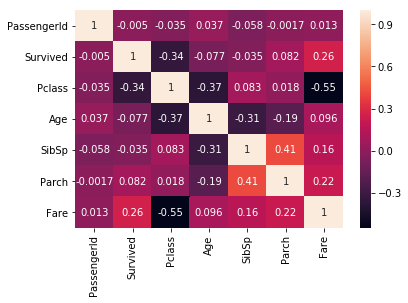

In [67]:
sns.heatmap(data.corr(), annot=True)

In [75]:
f = data.dropna().corr()

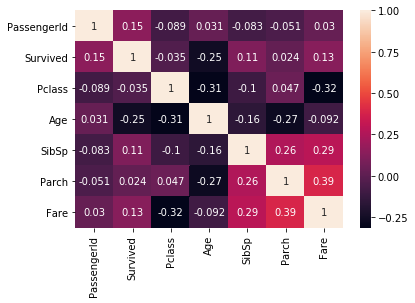

In [76]:
sns.heatmap(f, annot=True)

In [77]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [97]:
X = data[features]

In [98]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [102]:
X.Age = X.Age.fillna(0)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [106]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [107]:
X.fillna(0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [108]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [109]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [111]:
y = data.Survived

In [112]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [116]:
X = pd.get_dummies(X)

In [117]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,1
5,3,0.0,0,0,8.4583,0,1,0,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,0,1,0,0


In [120]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# 3 建模讯模
my_pipeline = make_pipeline(Imputer(), XGBRegressor(n_estimators=1000, learning_rate=0.05))
my_pipeline.fit(train_X, train_y)
# 4 误差验证
val_preds = my_pipeline.predict(val_X)
val_pre = [int(item>0.5) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accuracy: 0.780269


In [122]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svc=make_pipeline(StandardScaler(),SVC(random_state=1))

In [123]:
my_pipeline.fit(train_X, train_y)
# 4 误差验证
val_preds = my_pipeline.predict(val_X)
val_pre = [int(item>0.5) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accuracy: 0.780269


In [126]:
file_path = 'input/train.csv'
data = pd.read_csv(file_path)
data_cate = data.select_dtypes(['object'])
data_without_cate = data.select_dtypes(exclude=['object'])
one_hot_data_cate = pd.get_dummies(data_cate)
data_dummy = pd.concat([data_without_cate, one_hot_data_cate], axis=1)

# 2 选取变量
y = data_dummy.Survived
X = data_dummy.drop(['Survived'], axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# 3 建模讯模
my_pipeline = make_pipeline(Imputer(), XGBRegressor(n_estimators=1000, learning_rate=0.05))
my_pipeline.fit(train_X, train_y)
# 4 误差验证
val_preds = my_pipeline.predict(val_X)
val_pre = [int(item>0.5) for  item in val_preds]
score = accuracy_score(val_pre, val_y)
print("Accuracy: %2f" %score)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accuracy: 0.789238


In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, X.astype(float), y,scoring='accuracy', cv=5)
np.mean(scores_svm)

0.8047998306255046